In [1]:
# Import libraries
import pandas as pd
import numpy as np
import re
from pathlib import Path

In [2]:
# Import data and process into usable format
data_list = []

for p in Path('../data/aclimdb/train/neg').glob('*.txt'):
    with p.open() as f:
        file_name = re.split('_|\.', p.name)
        review_id = file_name[0]
        review_score = int(file_name[1])
        # append review id, review score, review text, and binary label (0 = negative)
        data_list.append([review_id, review_score, f.read(), 0])

for p in Path('../data/aclimdb/train/pos').glob('*.txt'):
    with p.open() as f:
        file_name = re.split('_|\.', p.name)
        review_id = file_name[0]
        review_score = int(file_name[1])
        # append review id, review score, review text, and binary label (1 = positive)
        data_list.append([review_id, review_score, f.read(), 1])

df = pd.DataFrame(data_list, columns = ['review_id', 'review_score', 'review_text', 'label'])

In [3]:
# Examine data
print("Shape:", df.shape)
print("Total positive: ", sum(df['label']))
df.head()

Shape: (25000, 4)
Total positive:  12500


,review_id,review_score,review_text,label
0,1821,4,Working with one of the best Shakespeare sourc...,0
1,10402,1,"Well...tremors I, the original started off in ...",0
2,1062,4,Ouch! This one was a bit painful to sit throug...,0
3,9056,1,"I've seen some crappy movies in my life, but t...",0
4,5392,3,"""Carriers"" follows the exploits of two guys an...",0


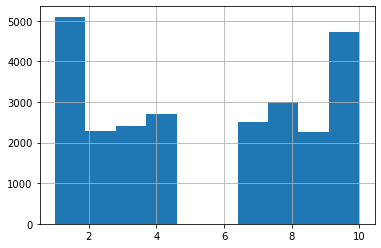

In [4]:
# Check distribution of scores
df['review_score'].hist(bins = 10)

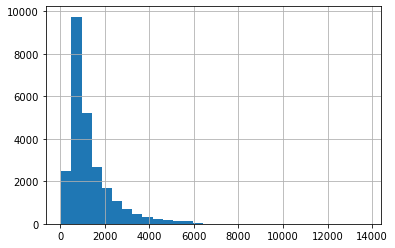

In [5]:
# Check length of reviews
review_lengths = df.review_text.str.len()
review_lengths.hist(bins = 30)